In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
data_path = "../MRNet/MRNet-v1.0/train/axial/0000.npy"

In [3]:
img = np.load(data_path)
print(img.dtype)

uint8


In [4]:
print(img.shape)

(44, 256, 256)


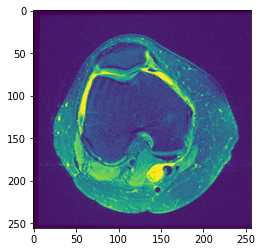

In [5]:
fig, axs = plt.subplots()
axs.imshow(img[20, :, :])
plt.show()

In [11]:
img_denoised = np.copy(img)
for i in range(img_denoised.shape[0]):
    img_denoised[i] = cv2.fastNlMeansDenoising(img_denoised[i], None, 10)

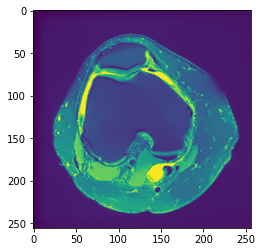

In [12]:
fig, axs = plt.subplots()
axs.imshow(img_denoised[20, :, :])
plt.show()

In [19]:
mask = np.ones_like(img_denoised)
for i in range(img_denoised.shape[0]):
    for j in range(img_denoised.shape[1]):
        # From left to right
        for k in range(img_denoised.shape[2]):
            if img_denoised[i, j, k] < 0.2 * 255:
                mask[i, j, k] = 0
            else:
                break
        # From right to left
        for k in range(img_denoised.shape[2] - 1, -1, -1):
            if img_denoised[i, j, k] < 0.2 * 255:
                mask[i, j, k] = 0
            else:
                break

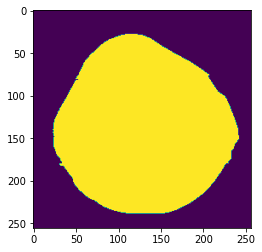

In [20]:
fig, axs = plt.subplots()
axs.imshow(mask[20, :, :])
plt.show()

In [21]:
img_inverse = np.copy(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            img_inverse[i, j, k] = 1 - img_inverse[i, j, k]

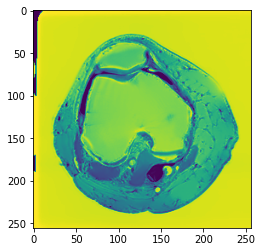

In [22]:
fig, axs = plt.subplots()
axs.imshow(img_inverse[20, :, :])
plt.show()

In [24]:
img_processed = mask * img_inverse

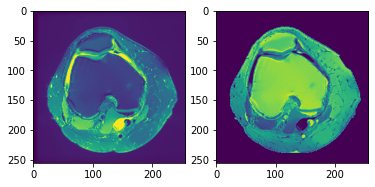

In [25]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img[20, :, :])
axs[1].imshow(img_processed[20, :, :])
plt.show()